In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
import os
import seaborn as sns

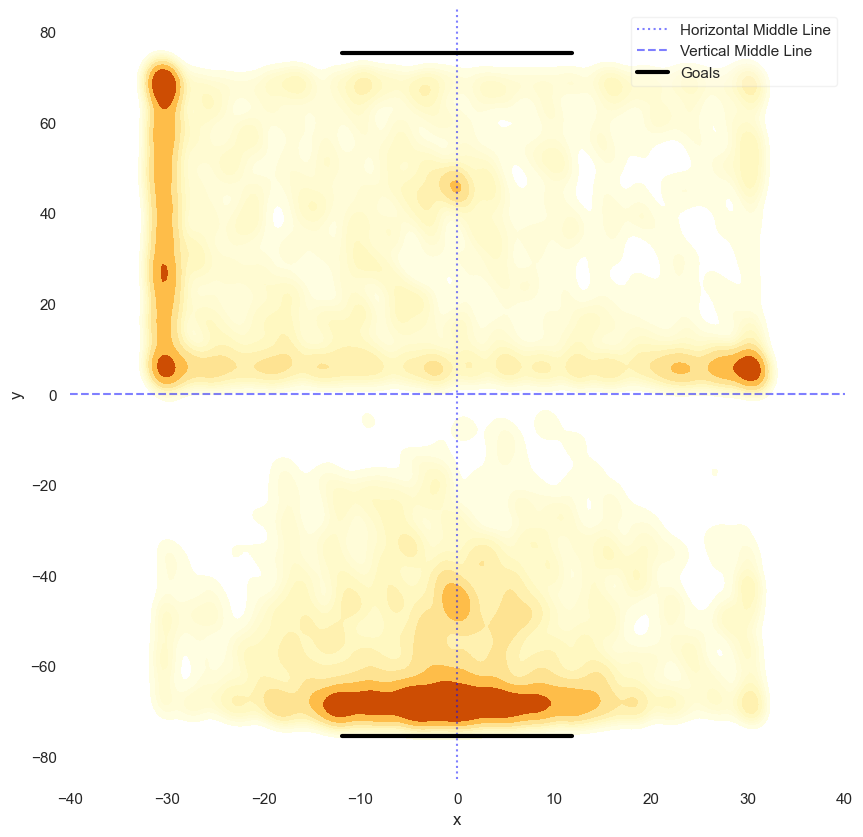

In [8]:
# Read the CSV file into a pandas DataFrame
data1 = pd.read_csv(r"C:\repos\positions\PusherAgent_position_data.csv")
# Read second CSV file into a pandas DataFrame
data2 = pd.read_csv(r"C:\repos\positions\PusherHumanSelfplay_position_data.csv")
# Concatenate the two dataframes
data = pd.concat([data1, data2], ignore_index=True)

# Set plot style and size
sns.set(style="white")
plt.figure(figsize=(10, 10))

# Create the spatial heatmap (KDE plot) using seaborn
ax = sns.kdeplot(
    x=data["PosX"],
    y=data["PosZ"],
    cmap="YlOrBr",
    fill=True,  # Fill the contour plot
    bw_adjust=0.25,  # Adjust the bandwidth of the kernel
    cbar=False,  # Display a colorbar
)

# Set x and y-axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")

# Set axis limits
ax.set_xlim(-40, 40)
ax.set_ylim(-85, 85)

# Add middle lines
ax.axvline(0, color="blue", linestyle="dotted", alpha=0.5, label="Horizontal Middle Line")
ax.axhline(0, color="blue", linestyle="--", alpha=0.5, label="Vertical Middle Line")

# Add goals
ax.axhline(-75.4, xmin=0.3514, xmax=0.6486, color="black", linestyle="-", linewidth=3, alpha=1, label="Goals")
ax.axhline(75.4, xmin=0.3514, xmax=0.6486, color="black", linestyle="-", linewidth=3, alpha=1)

# Add legend
ax.legend(framealpha=0.25)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

# Display the spatial heatmap
plt.show()

